<a href="https://colab.research.google.com/github/SantosAbimaelRomero/Project-2/blob/main/Phishing_Data_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# Cleaning Data

In [ ]:
# Copy of Data
df1 = df

In [ ]:
# Duplicates
df1.duplicated().sum()

0

In [ ]:
# Missing Data
df1.isna().sum().sum()

0

In [ ]:
# Incorrect data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
df1['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

Most columns are correctly either float or int columns, the only two object columns belong to the url column and the status column.

Our target is perfectly balanced.

# Presentation

With the following graphs, I will also address assumptions made by those that originally gathered the data against the actual data recovered, and/or assumptions made from other sources that have done similar investigations as to what can be used to identify an phishing url from a legitimate one.

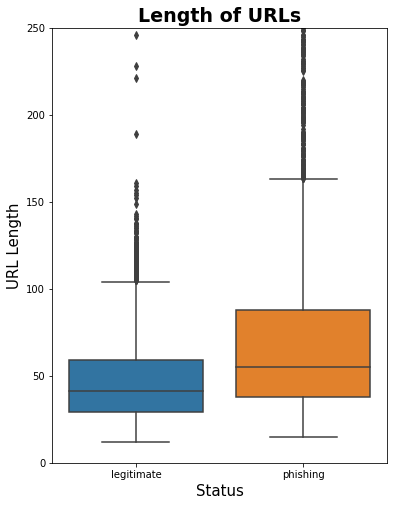

In [70]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='length_url')
axes.set_title('Length of URLs', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('URL Length', fontsize=15)
axes.set_ylim(bottom=0, top=250);

I shortened the graph, as the outliers for phising reach much higher numbers over 1,000.

Phishing urls should have longer urls.

The main difference in total length between legitimate and malicious urls lies in the outliers, but even looking closely at the IQR, malicious urls are overall longer in length than legitimate urls.

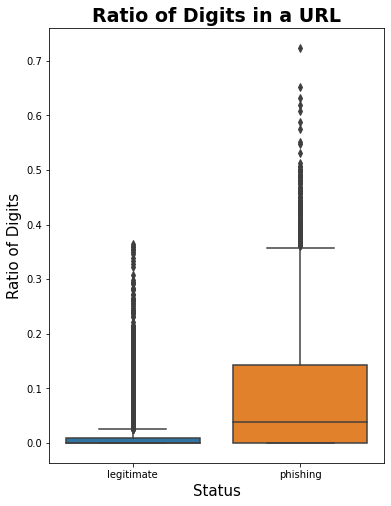

In [49]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='ratio_digits_url')
axes.set_title('Ratio of Digits in a URL', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('Ratio of Digits', fontsize=15);

The ratio of digits in a URL are typical indicators of phishing attempts, here we can see the large distiction in ratio of digits to total characters in a URL between a real and fake URL.

Phising websites have a far larger number of digits in the URL than a legitimate website would ever have, most of the overlap is in the outliers but the maximum for legitimate urls is significantly lower than the maximum for malicious urls.

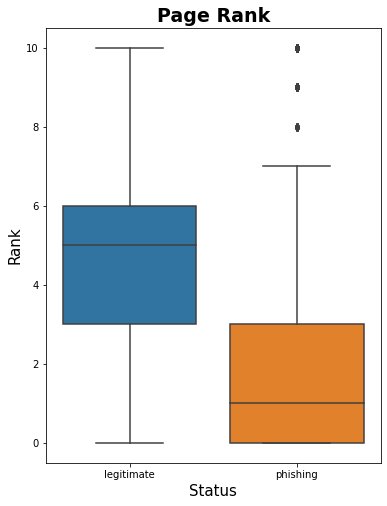

In [55]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='page_rank')
axes.set_title('Page Rank', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('Rank', fontsize=15);

Typically, phising websites are visited less than legitimate websites, so the rank should be lower.

This is clearly reflected here, legitimate urls will rank much higher than phishing urls as they are much more visited.

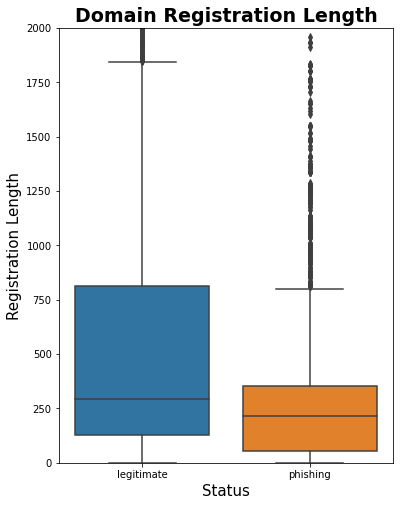

In [66]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='domain_registration_length')
axes.set_title('Domain Registration Length', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('Registration Length', fontsize=15)
axes.set_ylim(bottom=0, top=2000);

I shortened the y limit, the legitimate url outliers go for much higher, but the point is made.

Typically, since phishing websites are short lived, they won't be registered for a long time, and we can clearly see it here where legitimate websites are registered for much longer, the length is in years.

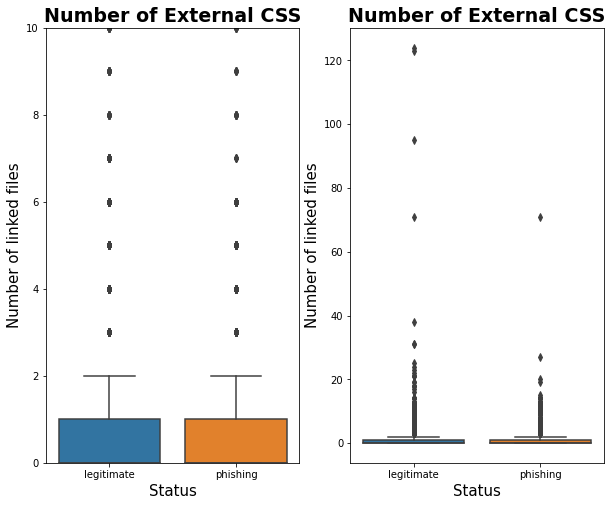

In [94]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 8))

sns.boxplot(data=df1, x='status', y='nb_extCSS', ax=axes[0])
axes[0].set_title('Number of External CSS', fontsize=19, weight='bold')
axes[0].set_xlabel('Status', fontsize=15)
axes[0].set_ylabel('Number of linked files', fontsize=15)
axes[0].set_ylim(bottom=0, top=10)

sns.boxplot(data=df1, x='status', y='nb_extCSS', ax=axes[1])
axes[1].set_title('Number of External CSS', fontsize=19, weight='bold')
axes[1].set_xlabel('Status', fontsize=15)
axes[1].set_ylabel('Number of linked files', fontsize=15);

For phishing websites, there is expected to be a small number of external CSS files, much less than legitimate websites.

The IQR and maximum are identical, the main difference lies in the outliers where legitimate urls have the potential to hit higher numbers, this metric is much harder to differentiate and the assumption doesn't seem accurate in our data.

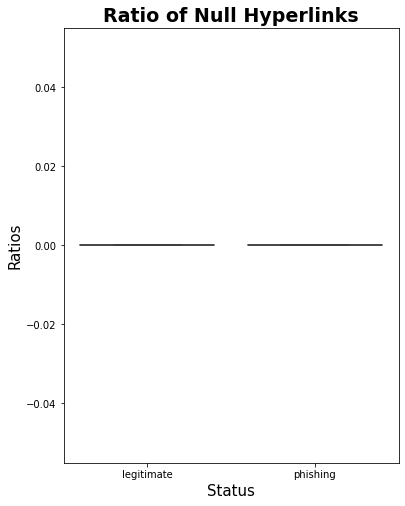

In [98]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='ratio_nullHyperlinks')
axes.set_title('Ratio of Null Hyperlinks', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('Ratios', fontsize=15);

To mimic real urls, the same number of hyperlinks that appear in phishing web pages but with empty links. So, phising urls should have more empty links.

Here we see that this theory was completely wrong in our specific data, there is not a single null hyperlink in any of our urls, authentic or malicious. This may be true in other sets of data but not for the one we are using currently.

Conclusion

Some assumptions for phishing websites were true, others not so much, but ultimately this is a solid set of data to train models in assisting this problem of accurately identifying phishing websites.